In [1]:
#  release an unreferenced memory 

import gc
gc.collect()

0

In [71]:
#Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium
import json
import datetime as dt
from sklearn.impute import SimpleImputer
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.cluster import KMeans
import pylab as pl
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D


In [72]:
#read in df

layoff_merge_clean2 =pd.read_csv(r'C:\Users\senoe\OneDrive\SEN Docs\Data Sci Job Applications\CareerFoundry\Datasets\Prepared data\layoff_merge_clean2.csv')

In [73]:
layoff_merge_clean2.head()

Unnamed: 0.1  Unnamed: 0    state                     company  \
0             0           0  Alabama  Corsicana Mattress Company   
1             1           1  Alabama                   EARTHLINK   
2             2           2  Alabama      JOHNSON CONTROLS, INC.   
3             3           3  Alabama                  FOOD WORLD   
4             4           4  Alabama                  FOOD WORLD   

   total_laid_off     location industry        country   day  month    year  
0              42  SF Bay Area   Crypto  United States  26.0    7.0  2021.0  
1              42  SF Bay Area   Crypto  United States   4.0    2.0  2015.0  
2              42  SF Bay Area   Crypto  United States  13.0    5.0  2011.0  
3              42  SF Bay Area   Crypto  United States  16.0    3.0  2009.0  
4              42  SF Bay Area   Crypto  United States  16.0    3.0  2009.0

In [74]:
layoff_merge_clean2= layoff_merge_clean2.drop('Unnamed: 0.1', axis='columns')

In [75]:
layoff_merge_clean2= layoff_merge_clean2.drop('Unnamed: 0', axis='columns')

In [76]:
layoff_merge_clean2.head(5)

state                     company  total_laid_off     location industry  \
0  Alabama  Corsicana Mattress Company              42  SF Bay Area   Crypto   
1  Alabama                   EARTHLINK              42  SF Bay Area   Crypto   
2  Alabama      JOHNSON CONTROLS, INC.              42  SF Bay Area   Crypto   
3  Alabama                  FOOD WORLD              42  SF Bay Area   Crypto   
4  Alabama                  FOOD WORLD              42  SF Bay Area   Crypto   

         country   day  month    year  
0  United States  26.0    7.0  2021.0  
1  United States   4.0    2.0  2015.0  
2  United States  13.0    5.0  2011.0  
3  United States  16.0    3.0  2009.0  
4  United States  16.0    3.0  2009.0

In [77]:
layoff_merge_clusters= layoff_merge_clean2.drop(['state', 'company', 'location', 'industry', 'country'], axis=1)

In [78]:
layoff_merge_clusters.head()

total_laid_off   day  month    year
0              42  26.0    7.0  2021.0
1              42   4.0    2.0  2015.0
2              42  13.0    5.0  2011.0
3              42  16.0    3.0  2009.0
4              42  16.0    3.0  2009.0

In [79]:
layoff_merge_clusters.dtypes

total_laid_off      int64
day               float64
month             float64
year              float64
dtype: object

In [90]:
layoff_merge_clusters =layoff_merge_clusters.fillna(0).astype(int)

In [91]:
num_cl= (2,10) #defined the range of potential clusters in the data
kmeans= [KMeans(n_clusters=i) for i in num_cl] #defines k-means clusters  # in the range we assigned above

### Error msg

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.  I decided to use 2 instead of 1

In [92]:
#apply your k-means algorithm

score = [kmeans[i].fit(layoff_merge_clusters).score(layoff_merge_clusters) for i in range(len(kmeans))]

In [93]:
score

[-1891813139.5347626, -174266460.00095248]

In [94]:
#Create k-means objects

kmeans= KMeans(n_clusters=3)

In [95]:
#Fit the k-means object to the data

kmeans.fit(layoff_merge_clusters)

KMeans(n_clusters=3)

In [96]:
layoff_merge_clusters['Clusters'] = kmeans.fit_predict(layoff_merge_clusters)

In [97]:
layoff_merge_clusters.head()

total_laid_off  day  month  year  Clusters
0              42   26      7  2021         0
1              42    4      2  2015         0
2              42   13      5  2011         0
3              42   16      3  2009         0
4              42   16      3  2009         0

In [98]:
layoff_merge_clusters['Clusters'].value_counts()

0    287131
2     40522
1     32888
Name: Clusters, dtype: int64

In [99]:
# using groupby function with aggregation
# to get mean, min and max values
total_layoff = layoff_merge_clusters.groupby('month').agg({'total_laid_off': ['mean', 'min', 'max']})
print(total_layoff)

      total_laid_off          
                mean min   max
month                         
0          83.834955   3  1400
1          70.392397   3  2800
2          66.933734   3  2000
3          65.470036   3  1900
4          65.229795   3  1877
5          76.312784   3   700
6          69.622223   3   900
7          70.374923   3  3000
8          88.330420   3  1000
9          68.667522   3  1750
10         73.429466   3  1300
11         75.124188   3   784
12         73.099348   3  1500


In [124]:
# using groupby function with aggregation
# to get mean, min and max values
total_layoff_day = layoff_merge_clusters.groupby('day').agg({'total_laid_off': ['mean', 'min', 'max']})
print(total_layoff)

      total_laid_off          
                mean min   max
month                         
0          83.834955   3  1400
1          70.392397   3  2800
2          66.933734   3  2000
3          65.470036   3  1900
4          65.229795   3  1877
5          76.312784   3   700
6          69.622223   3   900
7          70.374923   3  3000
8          88.330420   3  1000
9          68.667522   3  1750
10         73.429466   3  1300
11         75.124188   3   784
12         73.099348   3  1500


In [152]:
# using groupby function with aggregation
# to get mean, min and max values
total_layoff_year = layoff_merge_clusters.groupby('year').agg({'total_laid_off': ['mean', 'min', 'max']})
print(total_layoff)

      total_laid_off          
                mean min   max
month                         
0          83.834955   3  1400
1          70.392397   3  2800
2          66.933734   3  2000
3          65.470036   3  1900
4          65.229795   3  1877
5          76.312784   3   700
6          69.622223   3   900
7          70.374923   3  3000
8          88.330420   3  1000
9          68.667522   3  1750
10         73.429466   3  1300
11         75.124188   3   784
12         73.099348   3  1500


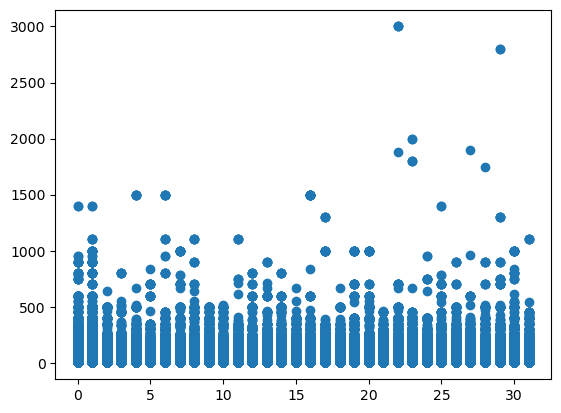

In [154]:
#create scatter plot

plt.scatter(layoff_merge_clusters['day'], layoff_merge_clusters['total_laid_off'], marker='o')
plt.show()

# Dayof week vs Total laid off

There seems to be no clear trend that would indicated clearly that once day of the month is preferrable to another.  There is a small edge that inidcates that the first day of the month might be preferred but ther is nearly that same numbers for the unkown day of the week which is almost identical to the 30th of the month.  The 3D plot below confirms my current theory. 

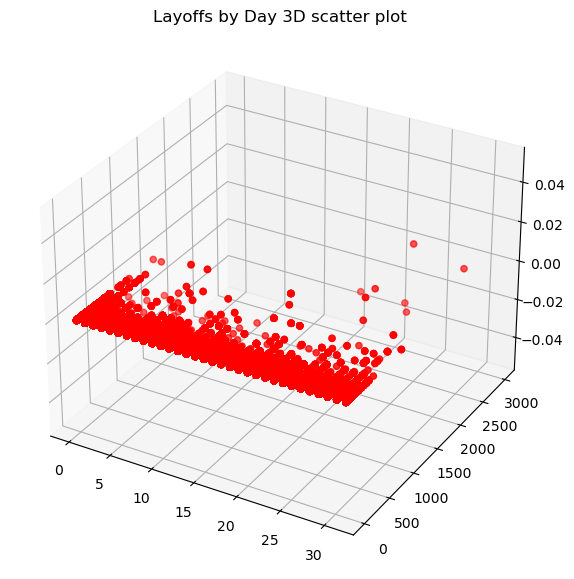

In [155]:
#Creating a 3d scatter plot 

# Creating dataset
z = np.random.randint(100, size =(50))
x = np.random.randint(80, size =(50))
y = np.random.randint(60, size =(50))
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(layoff_merge_clusters['day'], layoff_merge_clusters['total_laid_off'], color = "red")
plt.title("Layoffs by Day 3D scatter plot")
 
# show plot
plt.show()  


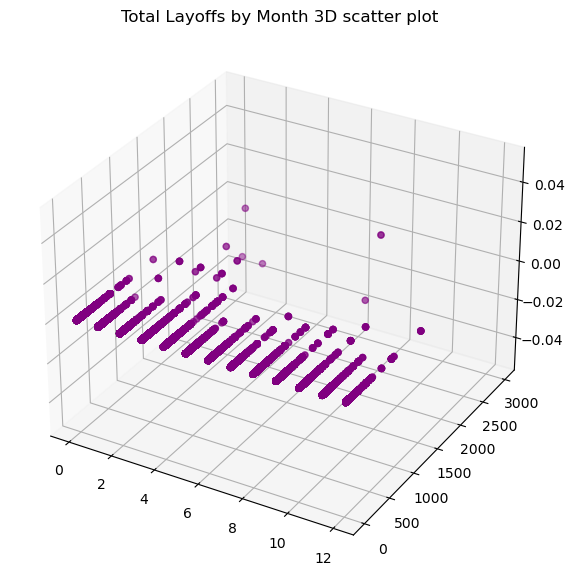

In [156]:
#Creating a 3d scatter plot 

# Creating dataset
z = np.random.randint(100, size =(50))
x = np.random.randint(80, size =(50))
y = np.random.randint(60, size =(50))
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(layoff_merge_clusters['month'], layoff_merge_clusters['total_laid_off'], color = "purple")
plt.title("Total Layoffs by Month 3D scatter plot")
 
# show plot
plt.show()  

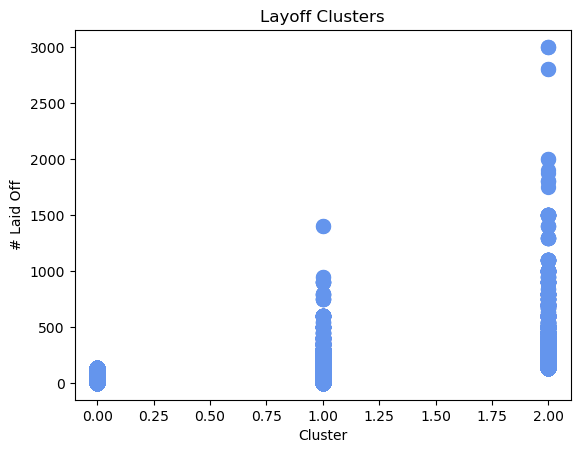

In [157]:
# The Pandas Plot Function

plt.scatter(layoff_merge_clusters['Clusters'], layoff_merge_clusters['total_laid_off'], marker='o',  s = 100, c='cornflowerblue')
plt.title("Layoff Clusters")
plt.xlabel("Cluster")
plt.ylabel("# Laid Off")
plt.show()


# Clusters

Ther larget cluster seems to be around group two.  Moving forward it would help to isolate group two and do further analysis to see what make this cluster unique.

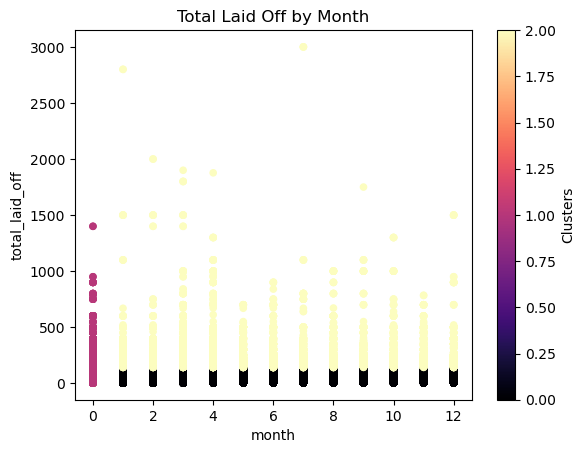

In [158]:
scatter = layoff_merge_clusters.plot(x = 'month', y = 'total_laid_off', kind = 'scatter', c ='Clusters', colormap = 'magma');
scatter.set_title('Total Laid Off by Month');
plt.show()


In [159]:
scatter.figure.savefig('laid_off_by_month.png')
                                     

# Overview

When looking at cluster, month and total numbers off once again cluster two seems to dominate in terms of numbers.  Further analysis is needed. 

In [161]:
#Create a path

path_new = r'C:\Users\senoe\OneDrive\SEN Docs\Data Sci Job Applications\CareerFoundry\Datasets'

In [163]:
# Export data to csv

layoff_merge_clusters.to_csv(os.path.join(path_new, 'Prepared data', 'layoff_merge_clusters.csv'))